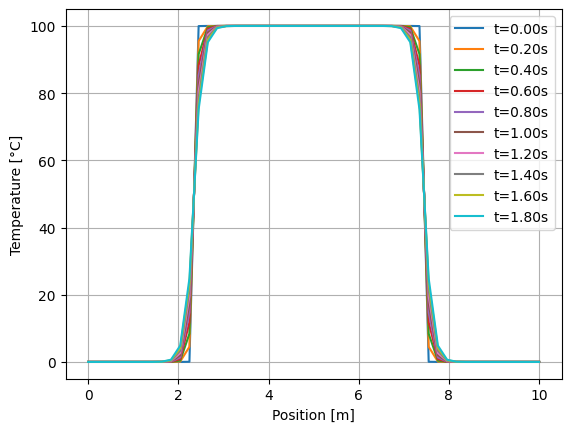

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# input parameters
L = 10.0  # Length of the rod (m)
T = 2.0   # Total time (s)
alpha = 0.01  # Thermal diffusivity (m^2/s)

# discretization parameters
nx = 50   # Number of spatial points
nt = 1000  # Number of time points
dx = L / (nx - 1)  # Spatial step size
dt = T / nt  # Time step size

# stability mask for explicit method
if dt > dx**2 / (2 * alpha):
    raise ValueError("Stability criterion violated. Reduce dt or increase dx.")

## temperature distribution init
u = np.zeros(nx)
u[int(nx/4):int(3*nx/4)] = 100  # Initial condition: heat in the middle of the rod

# # time integration using finite difference method
for n in range(nt):
    u_new = u.copy()
    for i in range(1, nx-1):
        u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2*u[i] + u[i-1])
    u = u_new

    # plotting the temp distribution at specific time intervals
    if n % (nt // 10) == 0:
        plt.plot(np.linspace(0, L, nx), u, label=f't={n*dt:.2f}s')

# final plot 
plt.xlabel('Position [m]')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.grid(True)
plt.show()
